
# Data Visualization with Matplotlib - Exercises

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้

## Data

In [244]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.arange(0,100)
y = x*2
z = x**2
df = pd.read_excel('Superstore.xls')

## Exercise 1


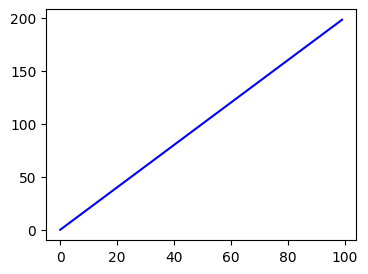

In [245]:
plt.figure(figsize=(4,3))
plt.plot(x , y , 'b')

## Exercise 2

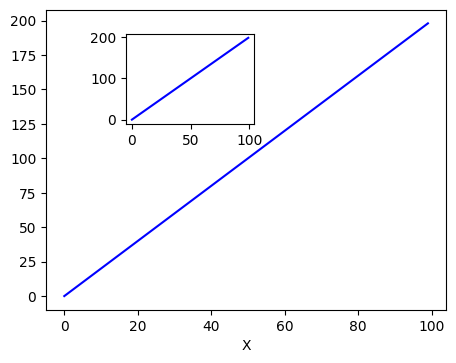

In [246]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('X')
ax.plot(x,y,'b')

ax2 = fig.add_axes([0.2,0.62,0.32,0.3])
ax2.plot(x,y,'b')

## Exercise 3



**ใช้  arrays x, y และ z เพื่อทำการ plot บนแกนที่สร้างจากข้อที่แล้ว  (Notice อย่าลืมกำหนด  x - limits และ y - limits )**

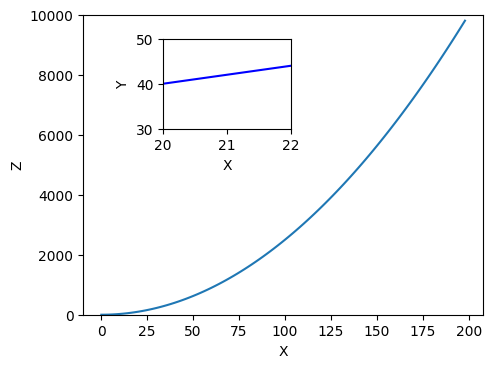

In [247]:
fig = plt.figure(figsize=(4,3), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Z')
ax.set_xlabel('X')
ax.set_ylim([0,10000])
ax.plot(y, z)

ax2 = fig.add_axes([0.2,0.62,0.32,0.3])
ax2.set_ylim([30,50])
ax2.set_xlim([20,22])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.plot(x,y,'b')

## Exercise 4

**จงใช้คำสั่ง plt.subplots(nrows=1, ncols=2)**

**จากนั้นให้ทำการ plot (x,y) และ plot (x,z) บนแกน axes  และให้ใช้งานคำสั่ง linewidth and style เพื่อตกแต่งเส้นของกราฟ**

C:\Users\puemm\AppData\Local\Temp\ipykernel_19316\369097109.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


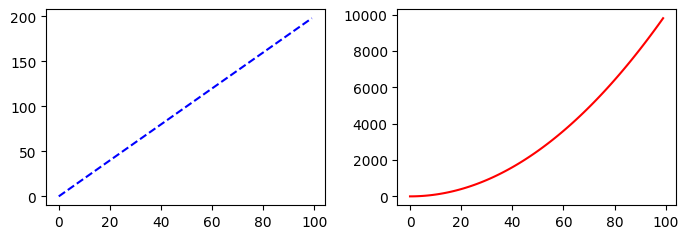

In [248]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,2.5))
axes[0].plot(x,y,'b--')
axes[1].plot(x,z,'r')

fig.tight_layout()
fig.show()

## Exercise 5

In [249]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## จงแสดงกราฟรายได้ของทุกปี

In [251]:
df1 = df.groupby('Year')['Profit'].sum()
a = df1.index
b = df1

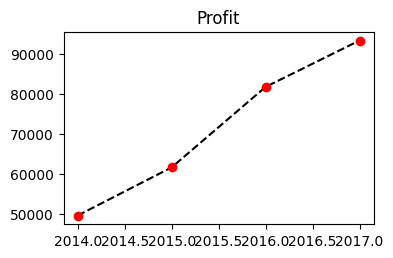

In [252]:
plt.figure(figsize=(4,2.5))
plt.title('Profit')
plt.plot(a,b, marker='o', mfc="r", mec="r", linestyle='--', color='#000000', label='Profit')
plt.show()

#### โค้ดต่อไปนี้ใช้ในสองข้อสุดท้าย

In [253]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [254]:
df[ df['Category'] == 'Furniture' ].groupby('Year').sum()['Profit']

C:\Users\puemm\AppData\Local\Temp\ipykernel_19316\4029972312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[ df['Category'] == 'Furniture' ].groupby('Year').sum()['Profit']


Year
2014    5457.7255
2015    3015.2029
2016    6959.9531
2017    3018.3913
Name: Profit, dtype: float64

##### Dictionary of Category

In [255]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

C:\Users\puemm\AppData\Local\Temp\ipykernel_19316\3300248628.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']
C:\Users\puemm\AppData\Local\Temp\ipykernel_19316\3300248628.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']
C:\Users\puemm\AppData\Local\Temp\ipykernel_19316\3300248628.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is depreca

## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปีในกราฟเดียว 

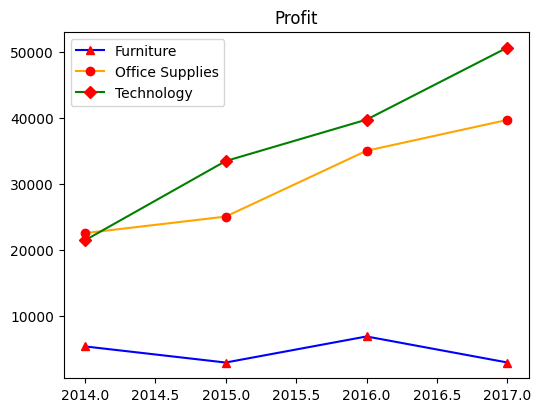

In [256]:
plt.figure(figsize=(6,4.5), dpi=100)
plt.title('Profit')
plt.plot(a,arr_df['Furniture'], marker='^', mfc="r", mec="r", color='b', label='Furniture')
plt.plot(a,arr_df['Office Supplies'], marker='o', mfc="r", mec="r", color='orange', label='Office Supplies')
plt.plot(a,arr_df['Technology'], marker='D', mfc="r", mec="r", color='g', label='Technology')
plt.legend()

## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปี แบบแยกกราฟ

Text(0.5, 1.0, 'Technology')

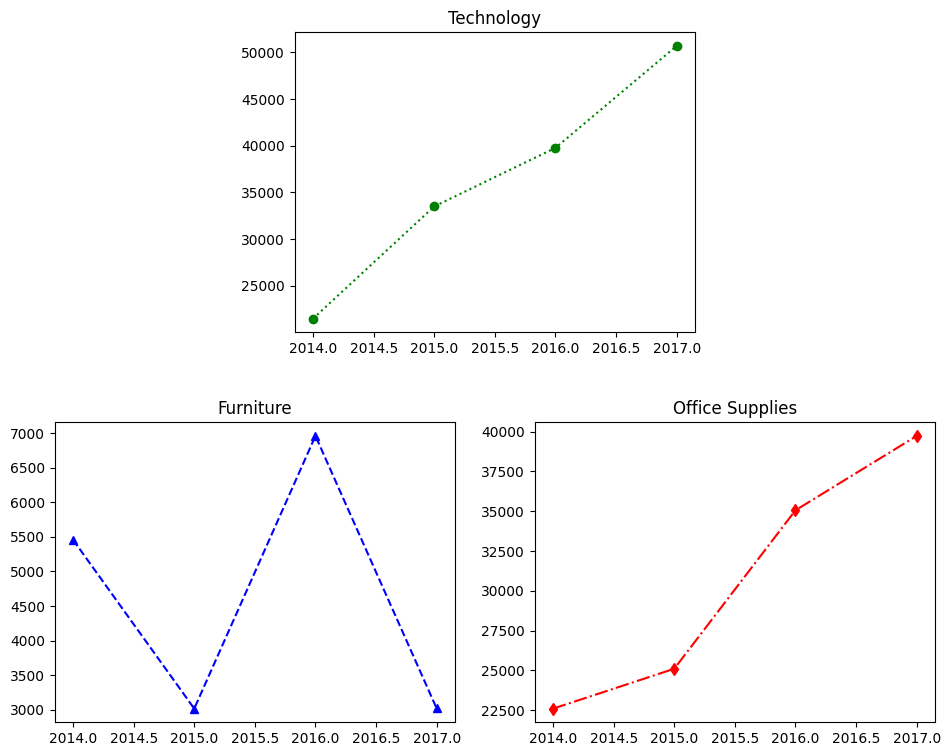

In [260]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.plot(a,arr_df['Furniture'],'^--b', label='Furniture')
ax.set_title('Furniture')

ax2 = fig.add_axes([1.2,0,1,1])
ax2.plot(a,arr_df['Office Supplies'],'d-.r', label='Office Supplies')
ax2.set_title('Office Supplies')

ax3 = fig.add_axes([0.6,1.3,1,1])
ax3.plot(a,arr_df['Technology'],'o:g', label='Technology')
ax3.set_title('Technology')